# BLABLABLA

In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')

In [7]:

home_stats = pd.read_csv('data/Train_data/train_home_team_statistics_df.csv', index_col=0)

results = pd.read_csv("./data/Y_train.csv", index_col=0)

merged_data = pd.merge(home_stats, results, on='ID')

merged_data['Result'] = None
merged_data.loc[merged_data['HOME_WINS'] == 1, 'Result'] = 'Victoire'
merged_data.loc[merged_data['DRAW'] == 1, 'Result'] = 'Nul'
merged_data.loc[merged_data['AWAY_WINS'] == 1, 'Result'] = 'Défaite'


# EDA

     Result      mean  median  count
0   Défaite  3.555921     3.0   3344
1       Nul  3.874514     3.0   2829
2  Victoire  4.686894     4.0   4746


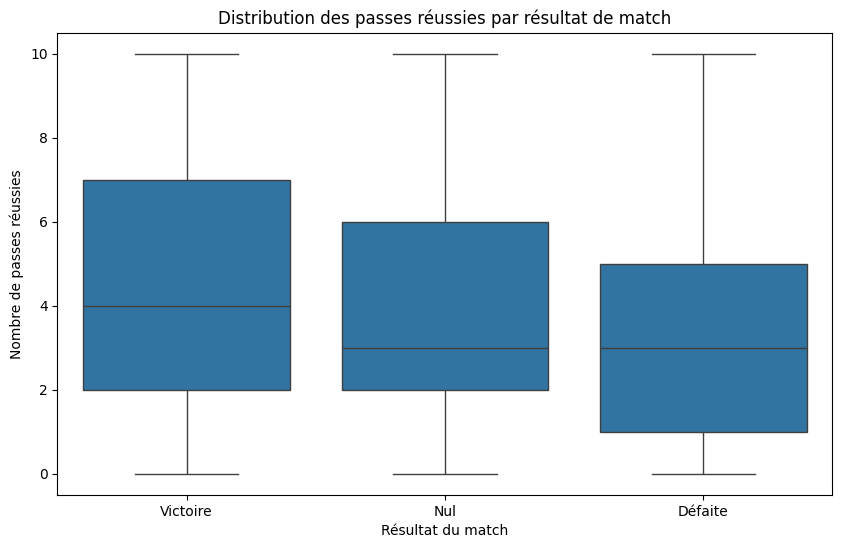

In [8]:
# PASSSES SUCCESS RATE BY MATCH RESULT

result_stats = merged_data.groupby('Result')['TEAM_SUCCESSFUL_PASSES_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_SUCCESSFUL_PASSES_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des passes réussies par résultat de match')
plt.ylabel('Nombre de passes réussies')
plt.xlabel('Résultat du match')
plt.show()


     Result      mean  median  count
0   Défaite  3.548670     3.0   3760
1       Nul  3.899215     4.0   3185
2  Victoire  4.723301     4.0   5356


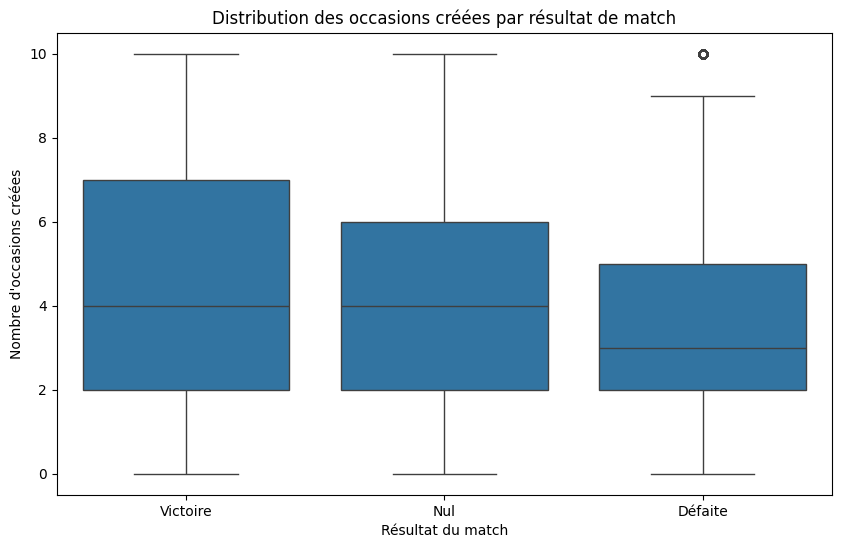

In [9]:
# OCCASSION S CREATED BY MATCH RESULT

result_stats = merged_data.groupby('Result')['TEAM_SHOTS_ON_TARGET_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_SHOTS_ON_TARGET_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des occasions créées par résultat de match')
plt.ylabel('Nombre d\'occasions créées')
plt.xlabel('Résultat du match')
plt.show()


     Result      mean  median  count
0   Défaite  3.942568     4.0   3761
1       Nul  4.323391     4.0   3185
2  Victoire  5.008588     5.0   5356


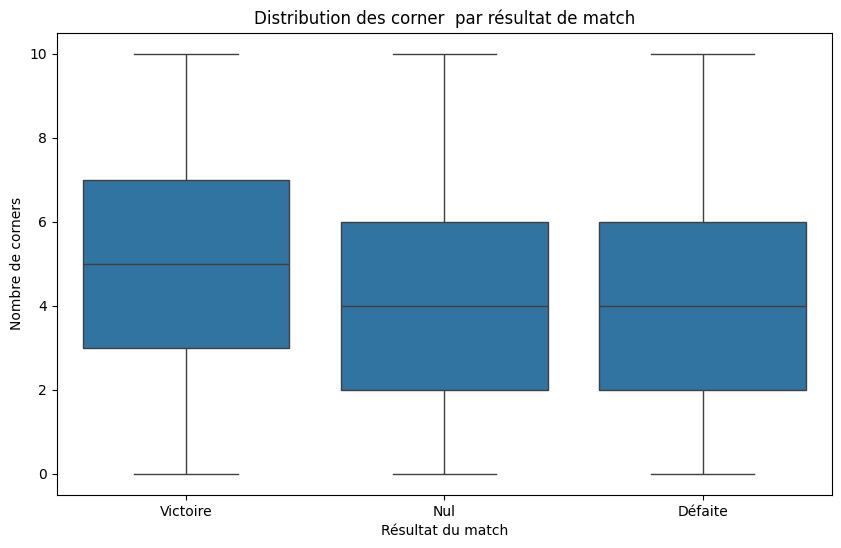

In [10]:
# par conner

result_stats = merged_data.groupby('Result')['TEAM_CORNERS_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_CORNERS_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des corner  par résultat de match')
plt.ylabel('Nombre de corners')
plt.xlabel('Résultat du match')
plt.show()

     Result      mean  median  count
0   Défaite  4.977654     5.0   3759
1       Nul  4.880414     5.0   3186
2  Victoire  4.617784     5.0   5353


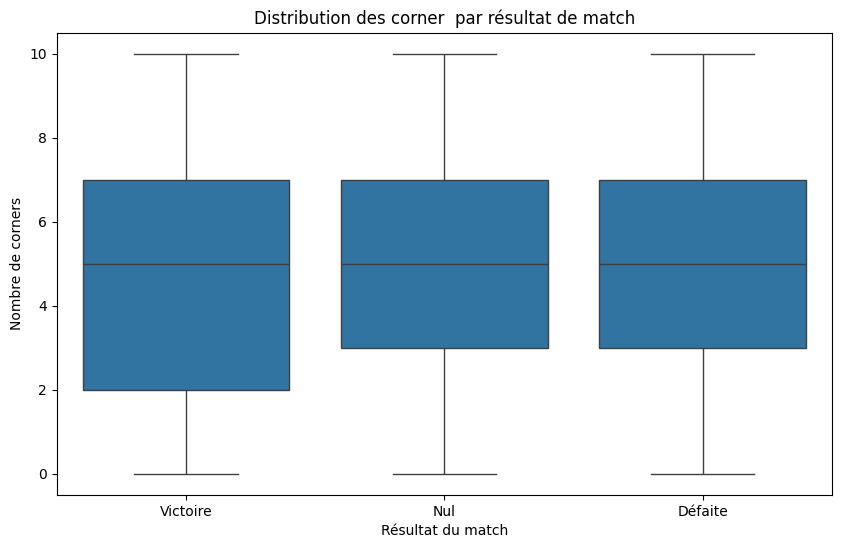

In [11]:
result_stats = merged_data.groupby('Result')['TEAM_YELLOWCARDS_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_YELLOWCARDS_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des corner  par résultat de match')
plt.ylabel('Nombre de corners')
plt.xlabel('Résultat du match')
plt.show()

     Result      mean  median  count
0   Défaite  3.515434     3.0   3758
1       Nul  3.660170     3.0   3181
2  Victoire  3.994951     4.0   5348


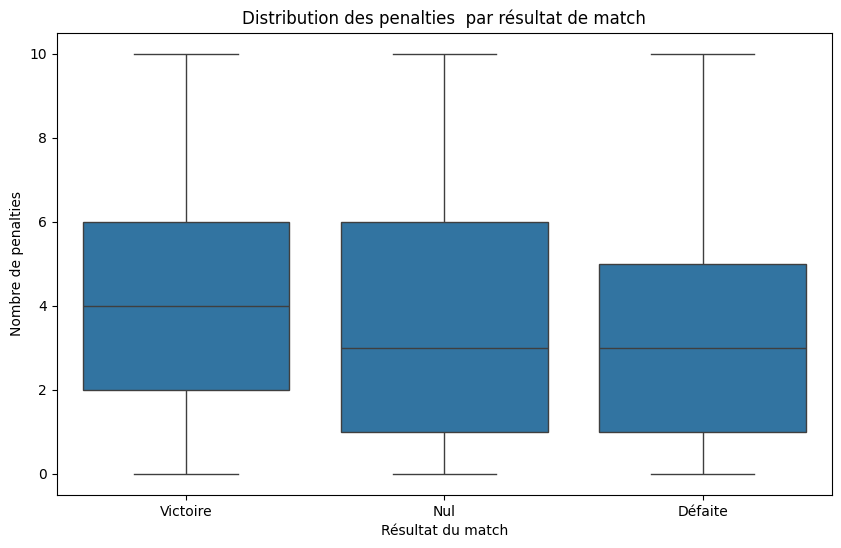

In [12]:
#par TEAM_PENALTIES_season_sum en fonction du résultat
result_stats = merged_data.groupby('Result')['TEAM_PENALTIES_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_PENALTIES_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des penalties  par résultat de match')
plt.ylabel('Nombre de penalties')
plt.xlabel('Résultat du match')
plt.show()

     Result      mean  median  count
0   Défaite  3.384206     3.0   3761
1       Nul  3.729042     3.0   3185
2  Victoire  4.556697     4.0   5353


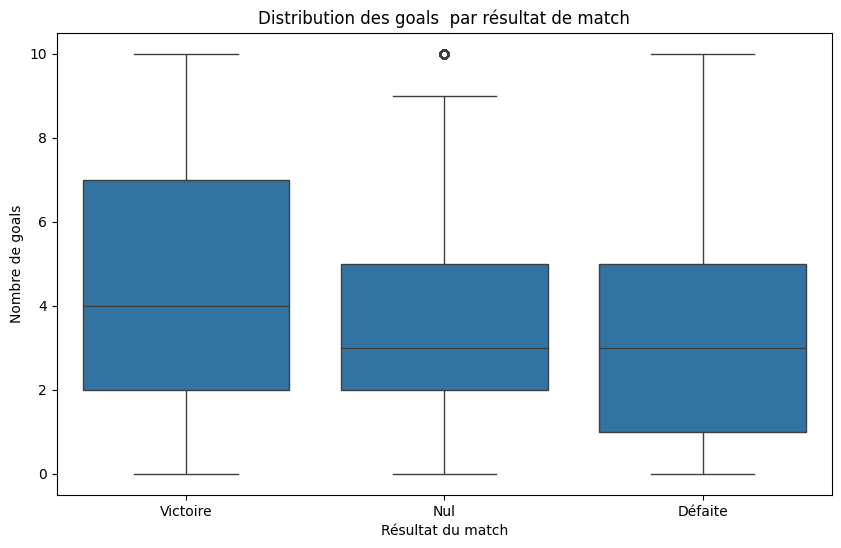

In [13]:
#TEAM_GOALS_season_sum en fonction du résultat
result_stats = merged_data.groupby('Result')['TEAM_GOALS_season_sum'].agg(['mean', 'median', 'count']).reset_index()
print(result_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='TEAM_GOALS_season_sum', data=merged_data, order=['Victoire', 'Nul', 'Défaite'])
plt.title('Distribution des goals  par résultat de match')
plt.ylabel('Nombre de goals')
plt.xlabel('Résultat du match')
plt.show()

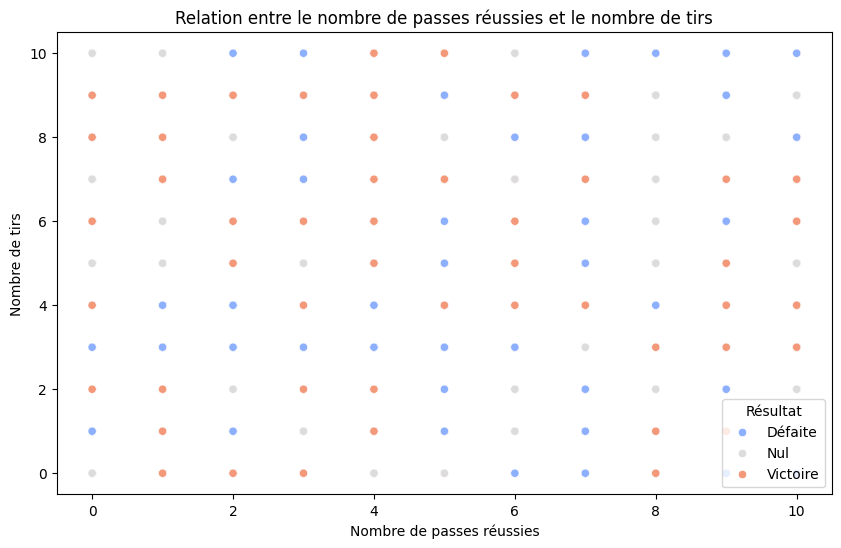

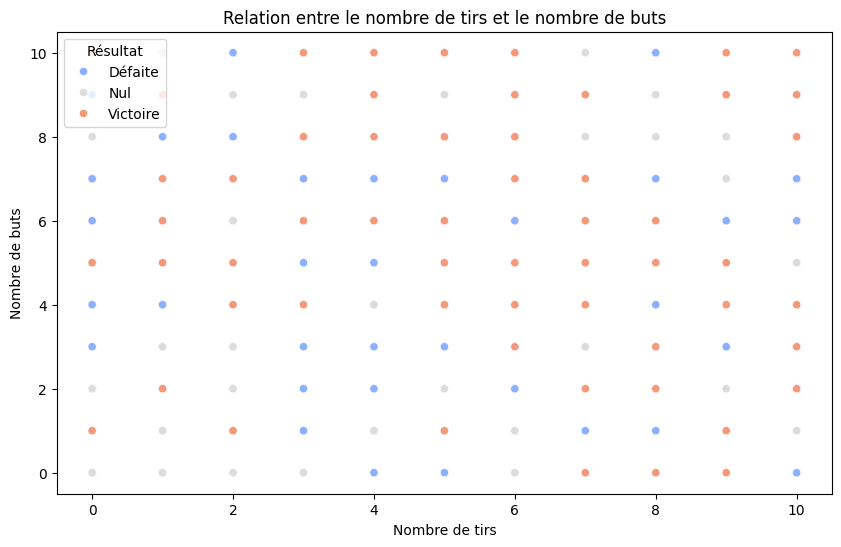

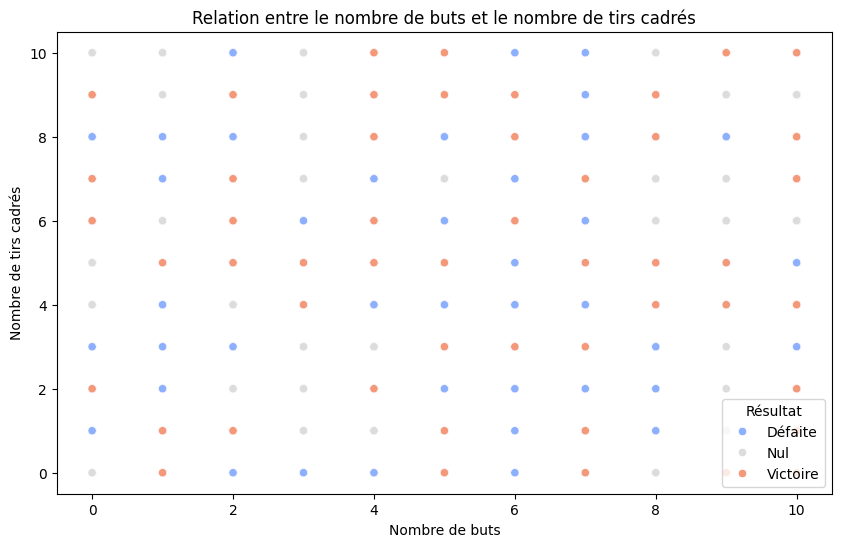

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TEAM_SUCCESSFUL_PASSES_season_sum', 
    y='TEAM_SHOTS_TOTAL_season_sum', 
    data=merged_data, 
    hue='Result', 
    palette='coolwarm'
)
plt.title('Relation entre le nombre de passes réussies et le nombre de tirs')
plt.xlabel('Nombre de passes réussies')
plt.ylabel('Nombre de tirs')
plt.legend(title='Résultat')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TEAM_SHOTS_TOTAL_season_sum', 
    y='TEAM_GOALS_season_sum', 
    data=merged_data, 
    hue='Result', 
    palette='coolwarm'
)
plt.title('Relation entre le nombre de tirs et le nombre de buts')
plt.xlabel('Nombre de tirs')
plt.ylabel('Nombre de buts')
plt.legend(title='Résultat')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TEAM_GOALS_season_sum', 
    y='TEAM_SHOTS_ON_TARGET_season_sum', 
    data=merged_data, 
    hue='Result', 
    palette='coolwarm'
)
plt.title('Relation entre le nombre de buts et le nombre de tirs cadrés')
plt.xlabel('Nombre de buts')
plt.ylabel('Nombre de tirs cadrés')
plt.legend(title='Résultat')
plt.show()